In [228]:
#import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

## Load MNIST data

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [77]:
xtest.shape

(10000, 28, 28)

In [79]:
xtrain_df = pd.DataFrame(xtrain.reshape(60000, 784))
xtest_df = pd.DataFrame(xtest.reshape(10000, 784))

ytrain_cat = to_categorical(ytrain, num_classes=10)
ytest_cat = to_categorical(ytest, num_classes=10)

## Define ANN model with 5 hidden layers

In [260]:
m1 = Sequential([
    Dense(25, input_shape=(784,)), #hardest part to get right
    #this means that each data point has 2 features / columns / dimensions
    # first 2 => 2 neurons, and the (2, ) means each data point has 2 dimensions
        Activation('relu'),
            BatchNormalization(),
                Dropout(0.1),
    Dense(25),
        Activation('relu'),
            BatchNormalization(),
                Dropout(0.1),
    Dense(25),
        Activation('relu'),
            BatchNormalization(),
                Dropout(0.1),
    Dense(25),
        Activation('relu'),
            BatchNormalization(),
                Dropout(0.1),
    Dense(25),
        Activation('relu'),
            BatchNormalization(),
                Dropout(0.1),
    Dense(10),
        Activation('softmax')  
])

In [230]:
m1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 25)                19625     
_________________________________________________________________
activation_73 (Activation)   (None, 25)                0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 25)                100       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 25)                650       
_________________________________________________________________
activation_74 (Activation)   (None, 25)                0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 25)              

In [261]:
m1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#compiling the model basically translates our keras code into lower-level TensorFlow / C++

In [210]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [262]:
history = m1.fit(xtrain_df, ytrain_cat, epochs=100, batch_size=5000, verbose = 2, callbacks=[callback], validation_split=0.2) # callbacks=[callback],
#epochs -> iteration of backpropagation
#batch_size -> chunk size / sub-epoch

Epoch 1/100
10/10 - 0s - loss: 2.4676 - accuracy: 0.1756 - val_loss: 2.6730 - val_accuracy: 0.1093
Epoch 2/100
10/10 - 0s - loss: 1.8670 - accuracy: 0.3497 - val_loss: 2.2830 - val_accuracy: 0.1466
Epoch 3/100
10/10 - 0s - loss: 1.5884 - accuracy: 0.4705 - val_loss: 2.0236 - val_accuracy: 0.2888
Epoch 4/100
10/10 - 0s - loss: 1.4059 - accuracy: 0.5517 - val_loss: 1.8376 - val_accuracy: 0.3677
Epoch 5/100
10/10 - 0s - loss: 1.2724 - accuracy: 0.6101 - val_loss: 1.6684 - val_accuracy: 0.4176
Epoch 6/100
10/10 - 0s - loss: 1.1359 - accuracy: 0.6640 - val_loss: 1.4959 - val_accuracy: 0.4880
Epoch 7/100
10/10 - 0s - loss: 1.0134 - accuracy: 0.7112 - val_loss: 1.3150 - val_accuracy: 0.5842
Epoch 8/100
10/10 - 0s - loss: 0.9071 - accuracy: 0.7489 - val_loss: 1.1215 - val_accuracy: 0.6909
Epoch 9/100
10/10 - 0s - loss: 0.8155 - accuracy: 0.7759 - val_loss: 0.9416 - val_accuracy: 0.7745
Epoch 10/100
10/10 - 0s - loss: 0.7430 - accuracy: 0.7963 - val_loss: 0.7991 - val_accuracy: 0.8266
Epoch 11/

In [14]:
ytrain_cat.reshape()

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
xtrain_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
score = m1.evaluate(X, y, batch_size=4)
print(score)
# Final Loss / Accuracy

NameError: name 'X' is not defined

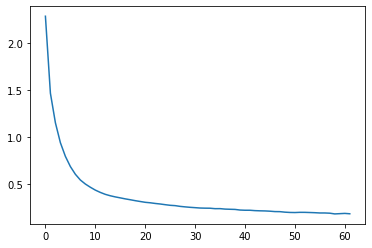

In [212]:
plt.plot(history.history['loss'])

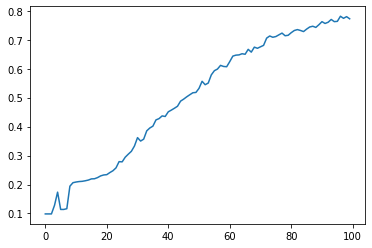

In [220]:
plt.plot(history.history['accuracy'])

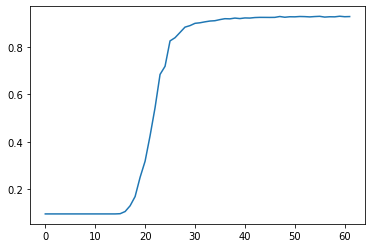

In [214]:
plt.plot(history.history['val_accuracy'])

In [263]:
score = m1.evaluate(xtrain_df, ytrain_cat, batch_size=5000)
print(score)
# Final Loss / Accuracy

12/12 [==============================] - 0s 6ms/step - loss: 0.1402 - accuracy: 0.9620
[0.1401960551738739, 0.9619500041007996]


In [264]:
score = m1.evaluate(xtest_df, ytest_cat, batch_size=50)
print(score)

200/200 [==============================] - 0s 995us/step - loss: 0.1834 - accuracy: 0.9500
[0.18340252339839935, 0.949999988079071]
